**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**

---

In [11]:
import numpy as np
import pandas as pd
import os
import sys
import scipy

import matplotlib.pyplot as plt

import seaborn as sns

### Note 
To run this chunk you need:

*rpy2==3.4.2  ///  anndata2ri==1.0.6*

In [12]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
df1 = pd.read_csv('../results/SC_limma_Trophoblast_LIS_24h/1_DEGs_SC_LIS_24h_VCT_fusing.tsv', index_col=0,sep='\t')
df2 = pd.read_csv('../results/SC_limma_Trophoblast_LIS_24h/2_DEGs_SC_LIS_24h_VCT.tsv', index_col=0,sep='\t')

In [14]:
df1.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
TIMP1,0.680611,8.260483,79.159917,1.465612e-08,0.000111,0.000034
AKR1B1,-0.340396,11.481607,78.292861,1.607117e-08,0.000122,0.000034
IL1B,1.054424,4.226661,75.946173,2.071042e-08,0.000157,0.000034
HMOX1,-0.412047,10.674469,81.704282,1.123452e-08,0.000085,0.000034
CCL20,1.289987,4.382292,75.347699,2.211625e-08,0.000168,0.000034


In [15]:
df2.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
TIMP1,0.790908,8.111007,161.926302,1.839387e-12,1.749257e-08,1.749257e-08
CXCL8,0.717749,7.067350,132.519030,1.602635e-11,1.524106e-07,7.620529e-08
CIB2,-1.024197,4.474435,110.475324,1.080982e-10,1.028014e-06,3.426712e-07
GJA5,-0.627947,6.949372,103.776422,2.055451e-10,1.954734e-06,4.886835e-07
CLIP4,0.551446,6.074261,96.669251,4.221855e-10,4.014984e-06,5.735692e-07


#  VCT_fusing

In [16]:
df1up= df1[(df1['logFC'] > 0) ]
df1_down= df1[(df1['logFC'] < 0) ]

In [17]:
#df1_down['avg_log2FC']= df1_down['avg_log2FC']*-1
df1_temp = pd.concat([df1up, df1_down])

In [18]:
%%R

library(Cairo)
library(ggplot2)
library(ggrepel)
library(EnhancedVolcano)
library(magrittr)

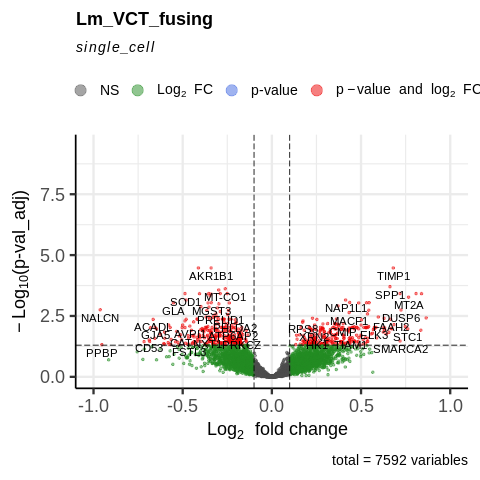

In [19]:
%%R -i df1_temp

EnhancedVolcano(df1_temp, lab = rownames(df1_temp), x="logFC", y="p_val_adj",  
                #selectLab = c('CXCL8','IL1B'),
                
                pCutoff=0.05,
                FCcutoff = 0.1, title = "Lm_VCT_fusing", subtitle = bquote(italic(single_cell)), 
                ylab = bquote(-Log[10] * "(p-val_adj)"), xlim = c(-1, 1), pointSize =1,
                labSize = 4)
#ggsave("volcano_plot_Pf_VCT_fusing_SN_day2.eps",  device=cairo_ps, width =7,   height =7)




In [20]:
x= df1_temp[(df1_temp['p_val_adj'] < 0.05) ]

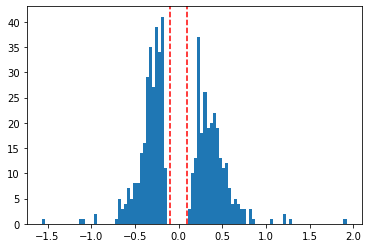

In [21]:
plt.hist(x['logFC'], bins = 100)
plt.axvline(0.1, linestyle = '--', color = 'red')
plt.axvline(-0.1, linestyle = '--', color = 'red')

## Note:
Save DEGs list:

    p_val_adj < 0.05
    
    avg_log2FC > 0.1
    
    ==> Input to metascape

### Significant Up reg in VCT_fusing

In [22]:
upDEG= df1[(df1['p_val_adj'] < 0.05) & (df1['logFC'] > 0.1)]

In [23]:
upDEG.to_csv('../results/SC_limma_Trophoblast_LIS_24h/1_DEGs_UP_SC_LIS_24h_VCTfusing.tsv', index=True, sep='\t')

In [24]:
upDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
TIMP1,0.680611,8.260483,79.159917,1.465612e-08,0.000111,0.000034
IL1B,1.054424,4.226661,75.946173,2.071042e-08,0.000157,0.000034
CCL20,1.289987,4.382292,75.347699,2.211625e-08,0.000168,0.000034
PTGS2,1.212487,3.317895,72.663077,2.984766e-08,0.000227,0.000038
LINC02109,1.920732,5.358849,58.137602,1.789002e-07,0.001358,0.000194


In [29]:
upDEG.shape

(258, 6)

In [30]:
list(upDEG.index)

['TIMP1',
 'IL1B',
 'CCL20',
 'PTGS2',
 'LINC02109',
 'SPP1',
 'TNFRSF1B',
 'ARHGEF3',
 'OLR1',
 'MT2A',
 'NAP1L1',
 'TFPI',
 'RBMS3',
 'AP002336.2',
 'CXCL8',
 'DMD',
 'R3HCC1L',
 'DUSP6',
 'SRGN',
 'MACF1',
 'AC073333.1',
 'CXCL5',
 'TACSTD2',
 'CCL3L1',
 'RPL36A',
 'MYO1D',
 'FAAH2',
 'NARS',
 'PIK3R1',
 'RPS8',
 'RPL36',
 'YBX3',
 'CMIP',
 'TES',
 'EXOC4',
 'LGALS1',
 'DHX40',
 'LMBR1',
 'CXCL2',
 'SULF2',
 'DARS',
 'HERC2',
 'C1orf21',
 'LCP1',
 'CXCL3',
 'IER3',
 'RPS20',
 'CYTOR',
 'PLAUR',
 'DSG2',
 'CKAP4',
 'WRN',
 'PDLIM5',
 'ELK3',
 'SOD2',
 'ATP2B4',
 'LINC00882',
 'CCL4',
 'CCL3',
 'FOXJ2',
 'DDX10',
 'OPHN1',
 'MAP3K20',
 'ARL15',
 'PHF14',
 'LPP',
 'RPL12',
 'DSE',
 'RCAN1',
 'CAPZA1',
 'C15orf48',
 'DOCK5',
 'MYO9A',
 'LRRC75A',
 'STC1',
 'RDX',
 'AL139807.1',
 'FMN1',
 'RBPMS',
 'UBA1',
 'ZNF614',
 'EIF2S3',
 'LRRFIP1',
 'KYNU',
 'XRN2',
 'RO60',
 'AP002954.1',
 'MTUS1',
 'BCAT1',
 'PTPRA',
 'TSC22D2',
 'IQGAP1',
 'NRK',
 'MIR181A2HG',
 'AREG',
 'NFKBIZ',
 'RBM47',
 '

### Significant Down reg in VCT_fusing

In [25]:
downDEG= df1[(df1['p_val_adj'] < 0.05) & (df1['logFC'] < -0.1)]

In [26]:
downDEG.to_csv('../results/SC_limma_Trophoblast_LIS_24h/1_DEGs_DOWN_SC_LIS_24h_VCTfusing.tsv', index=True, sep='\t')

In [28]:
downDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
AKR1B1,-0.340396,11.481607,78.292861,1.607117e-08,0.000122,0.000034
HMOX1,-0.412047,10.674469,81.704282,1.123452e-08,0.000085,0.000034
MT-CO1,-0.261336,13.388396,54.732477,2.857591e-07,0.002169,0.000241
MT-CO3,-0.297818,13.004755,53.186152,3.560151e-07,0.002703,0.000270
GNAS,-0.249716,10.134207,46.990099,9.028107e-07,0.006854,0.000381


In [31]:
downDEG.shape

(292, 6)

In [32]:
list(downDEG.index)

['AKR1B1',
 'HMOX1',
 'MT-CO1',
 'MT-CO3',
 'GNAS',
 'CTSL',
 'MYDGF',
 'SOD1',
 'HSD17B1',
 'SDF2',
 'LRPAP1',
 'NTAN1',
 'MGST3',
 'GRN',
 'GLA',
 'MT-ATP6',
 'LMAN2',
 'B4GALT3',
 'MAP2K2',
 'SIAH2',
 'NALCN',
 'P4HB',
 'ARL5A',
 'PRELID1',
 'TMEM59',
 'AC011287.1',
 'ATP5F1C',
 'SRSF9',
 'COMT',
 'SAR1B',
 'SARAF',
 'ITGBL1',
 'ITM2B',
 'PSMC5',
 'CLDN4',
 'GPT2',
 'CDKN1C',
 'TMEM115',
 'ANXA5',
 'FBLN1',
 'REXO2',
 'SLC3A2',
 'TVP23A',
 'MT-CYB',
 'ISYNA1',
 'ACADL',
 'PHLDA2',
 'TJP3',
 'POLR2H',
 'CAVIN1',
 'CYP19A1',
 'COPE',
 'DDRGK1',
 'PPIB',
 'LDHB',
 'GDF15',
 'HSPB1',
 'OVGP1',
 'ZNF268',
 'RAB5IF',
 'AVPI1',
 'MTHFS',
 'AP2M1',
 'CTSD',
 'WDR34',
 'MAP7D1',
 'FXYD3',
 'MTRNR2L12',
 'EMC7',
 'PEBP1',
 'PRDX6',
 'GJA5',
 'ORMDL1',
 'MYL12A',
 'MRPS15',
 'EGLN2',
 'SLC27A2',
 'CHPT1',
 'PPT2',
 'ATP6AP2',
 'ARL16',
 'TIMM29',
 'IMPA2',
 'SLC22A18AS',
 'PHF5A',
 'OAZ1',
 'SNAP29',
 'PCOLCE2',
 'SUCLG1',
 'SPSB3',
 'PDHB',
 'NOSIP',
 'PSMB1',
 'RAB5C',
 'PC',
 'CEP68',
 'MT-

---

#  VCT

### Significant Up reg in VCT

In [33]:
upDEG= df2[(df2['p_val_adj'] < 0.05) & (df2['logFC'] > 0.1)]

In [35]:
upDEG.to_csv('../results/SC_limma_Trophoblast_LIS_24h/2_DEGs_UP_SC_LIS_24h_VCT.tsv', index=True, sep='\t')

In [34]:
upDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
TIMP1,0.790908,8.111007,161.926302,1.839387e-12,1.749257e-08,1.749257e-08
CXCL8,0.717749,7.067350,132.519030,1.602635e-11,1.524106e-07,7.620529e-08
CLIP4,0.551446,6.074261,96.669251,4.221855e-10,4.014984e-06,5.735692e-07
IL1B,1.245488,4.258540,99.110268,3.281763e-10,3.120956e-06,5.735692e-07
ADAM12,1.024389,7.483833,92.547554,6.536630e-10,6.216335e-06,6.907039e-07


In [36]:
upDEG.shape

(1042, 6)

In [37]:
list(upDEG.index)

['TIMP1',
 'CXCL8',
 'CLIP4',
 'IL1B',
 'ADAM12',
 'ZFP36L1',
 'ARRDC3',
 'CCL20',
 'LGALS1',
 'SGPP2',
 'P4HA1',
 'LINC02109',
 'C15orf48',
 'MT2A',
 'TFPI',
 'PALM2-AKAP2',
 'MIR193BHG',
 'SPP1',
 'CBLB',
 'SIGLEC6',
 'VIM',
 'SYN3',
 'ERVH48-1',
 'YWHAZ',
 'TMEM45A',
 'SRGN',
 'DOCK5',
 'GTSF1',
 'AC006115.2',
 'AL355512.1',
 'PHLDA1',
 'DAPP1',
 'GATA3',
 'GBE1',
 'MTUS1',
 'AC025580.2',
 'OLR1',
 'AC008825.1',
 'PTGS2',
 'AC099329.1',
 'PARD6B',
 'PPP1R14B-AS1',
 'CXCL3',
 'EFHD1',
 'ERO1A',
 'RYBP',
 'FLNB',
 'IFNAR1',
 'PLCB1',
 'STC1',
 'ERRFI1',
 'FTH1',
 'C4orf3',
 'PLEKHA2',
 'FAM107B',
 'MID1',
 'S100P',
 'SYNJ2',
 'S100A6',
 'TNFRSF1B',
 'MIR4435-2HG',
 'HSP90B1',
 'TNFAIP3',
 'COTL1',
 'SMARCA2',
 'TES',
 'TMEM52B',
 'TRIML2',
 'TACSTD2',
 'SERPINB9',
 'PRRG1',
 'ATG9B',
 'ZNF165',
 'RNF24',
 'DSC2',
 'NEDD4L',
 'RPS8',
 'FAM83B',
 'LINC01004',
 'ROR2',
 'SQSTM1',
 'BASP1',
 'CST6',
 'LMO4',
 'ZNF611',
 'TINCR',
 'CMIP',
 'IQGAP1',
 'CCL5',
 'SOD2',
 'IL24',
 'GLCCI1',
 '

### Significant Down reg in VCT

In [38]:
downDEG= df2[(df2['p_val_adj'] < 0.05) & (df2['logFC'] < -0.1)]

In [39]:
downDEG.to_csv('../results/SC_limma_Trophoblast_LIS_24h/2_DEGs_DOWN_SC_LIS_24h_VCT.tsv', index=True, sep='\t')

In [40]:
downDEG.head()

,logFC,logCPM,F,PValue,bonferroni,p_val_adj
CIB2,-1.024197,4.474435,110.475324,1.080982e-10,0.000001,3.426712e-07
GJA5,-0.627947,6.949372,103.776422,2.055451e-10,0.000002,4.886835e-07
SERPINF1,-0.463130,8.238178,97.810922,3.750292e-10,0.000004,5.735692e-07
SLC27A2,-0.549250,7.335039,90.424494,8.237343e-10,0.000008,7.183912e-07
LDHB,-0.514094,9.252798,90.345224,8.309467e-10,0.000008,7.183912e-07


In [41]:
downDEG.shape

(957, 6)

In [43]:
list(downDEG.index)

['CIB2',
 'GJA5',
 'SERPINF1',
 'SLC27A2',
 'LDHB',
 'EFEMP1',
 'RCN2',
 'SOD1',
 'ORMDL1',
 'ITM2C',
 'F3',
 'GNAS',
 'FRAS1',
 'PEBP1',
 'CKMT1B',
 'MT-CO3',
 'COMT',
 'NFE2L3',
 'FXYD3',
 'MARC1',
 'TNIK',
 'CBX4',
 'SUCLG1',
 'FAM3B',
 'SMAGP',
 'BNC2',
 'GALNT11',
 'CAT',
 'FBLN1',
 'VLDLR',
 'BAG2',
 'MARCH3',
 'ADAMTS19',
 'FKBP4',
 'ISYNA1',
 'DECR1',
 'LY6E',
 'MPC2',
 'GLA',
 'PSMB6',
 'LINC00221',
 'NRP2',
 'MT-CO1',
 'RAB38',
 'STOM',
 'PARP1',
 'FBP1',
 'FBN1',
 'UBB',
 'PPM1G',
 'CYB5A',
 'GSTM3',
 'LRPAP1',
 'PSMD6',
 'MT-ATP6',
 'IDH2',
 'PGP',
 'PARD3B',
 'B4GAT1',
 'NSG1',
 'MPP1',
 'MCRIP2',
 'EMC7',
 'RANBP1',
 'VDAC3',
 'WLS',
 'SAC3D1',
 'MAP3K4',
 'DUSP9',
 'CYC1',
 'PDE4B',
 'CRYL1',
 'SLC25A5',
 'MGST3',
 'PHLDA2',
 'ZSWIM7',
 'ERP29',
 'CCT5',
 'LPCAT3',
 'PDHB',
 'ARHGAP6',
 'ATP6AP2',
 'TM7SF2',
 'AP1S3',
 'MT-CYB',
 'C1QBP',
 'FH',
 'NDUFV2',
 'SLBP',
 'CHPT1',
 'IDH3A',
 'MAP2K2',
 'MXD4',
 'TOX',
 'MAP7D2',
 'TSPAN13',
 'P3H2',
 'ADH5',
 'FANCM',
 'FBXO27

In [25]:
#temp= pd.read_table('../results/SC_Trophoblast_LIS_24h/2_DEGs_DOWN_SC_LIS_24h_VCT.tsv', index_col=0)
#list(temp.index)

['SOD1',
 'MT-CO1',
 'GNAS',
 'MT-CO3',
 'ISYNA1',
 'PEBP1',
 'LDHB',
 'SERPINF1',
 'CYB5A',
 'MGST3',
 'ITM2C',
 'COMT',
 'LINC00221',
 'NRP2',
 'FXYD3',
 'F3',
 'EMB',
 'LRPAP1',
 'FBLN1',
 'GJA5',
 'MT-ATP6',
 'MPP1',
 'SLC27A2',
 'CIB2',
 'EFEMP1',
 'FRAS1',
 'MARC1',
 'IDH2',
 'PDE4B',
 'BAG2',
 'DUSP9',
 'B4GAT1',
 'PARP1',
 'PARD3B',
 'ADAMTS19',
 'ERP29',
 'TNIK',
 'CD46',
 'NFE2L3',
 'P3H2',
 'CAT',
 'ORMDL1',
 'AP1S3',
 'SLBP',
 'MCRIP2',
 'GALNT11',
 'RCN2',
 'ATP5F1C',
 'CPT1A',
 'MRPS26',
 'MT-CYB',
 'HERC5',
 'TM7SF2',
 'GSTM3',
 'GCLM',
 'COL14A1',
 'MVB12B',
 'DECR1',
 'IDH3A',
 'DCXR',
 'PSMB6',
 'ANXA5',
 'CPLANE1',
 'SMAGP',
 'LPCAT3',
 'AC011287.1',
 'SUCLG1',
 'ECHDC1',
 'CHST12',
 'RAB38',
 'CRYL1',
 'GLA',
 'CYC1',
 'CBX4',
 'IDH1',
 'AC024230.1',
 'ATP6AP2',
 'TSPAN13',
 'COL21A1',
 'CHPT1',
 'MARCH3',
 'CTSC',
 'NME4',
 'ITGB8',
 'PGP',
 'GSTP1',
 'TCAF1',
 'DST',
 'SUGCT',
 'ECI2',
 'EFNA5',
 'LGR5',
 'DISC1',
 'FKBP4',
 'PGM1',
 'WLS',
 'UBB',
 'PAGE4',
 'P3H